Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

3 Observations from the data:

1. Cities within lower latitude range(i.e. regions closer to the equator) have higher temperature ranges

2. Cities within higher latitude range (i.e. regions farther from the equator) have a wide range of humidity (range from low humidity % to high humidity %) 

3. Cities within higher latitude range are more likely to experience higher wind speed (up to 30 mph) compared to other cities which have wind speeds from 1 to 20 mph

In [2]:
# Dependencies
import json
import requests
import random
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from config import api_key
from citipy import citipy
from pprint import pprint

In [143]:
#Create an empty list to store 500 random cities
city_list = []

#write the city list to csv
with open('city_data.csv', 'w', newline='') as newfile:  
        
    #initialize csv writer
    csvwriter = csv.writer(newfile, delimiter=',')  

    #write the city list to csv
    csvwriter.writerow(["City"])

    #Write a while loop to keep track of our list of cities. We want to make sure we have 500 unique cities.
    while len(city_list) < 500:  

        #generate random lat coordinates (bound between -90 and 90) and lng coordinates (bound between -180 and 180)
        lat = random.uniform(-90,90)
        lng = random.uniform(-180,180)
        
        #use the citypy library to generate the nearest city from the coordinates
        city = citipy.nearest_city(lat, lng).city_name
        
        #set the parameters to add to our base_url
        params = {
            "appid": api_key,
            "units": "imperial",
            "q": city
        }
        
        # Build the endpoint URL 
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        
        try:
            # Run a request to endpoint and get url
            weather_data = requests.get(base_url, params=params)
            
            #Raise the status to check for exception 
            weather_data.raise_for_status()
            
        except requests.exceptions.RequestException as e:
            
            #If there is an exception, print city does not exist
            print(f'{city} does not exist!')
            
            #continue with the try statement until it suceeds. Once it succeeds, move on to next statement
            continue
            
        #Since it suceeds, it means city is in openweathermap api, so check to see if city has been added to our list already
        if city not in city_list:
            
            #If city does not exist in our list, then add it
            city_list.append(city)
            
            #write the city to csv
            csvwriter.writerow([city])


illoqqortoormiut does not exist!
taolanaro does not exist!
vaitupu does not exist!
belushya guba does not exist!
umzimvubu does not exist!
samusu does not exist!
belushya guba does not exist!
rawannawi does not exist!
acarau does not exist!
barentsburg does not exist!
jiddah does not exist!
mys shmidta does not exist!
mys shmidta does not exist!
taolanaro does not exist!
tabiauea does not exist!
alotau does not exist!
taolanaro does not exist!
bengkulu does not exist!
barentsburg does not exist!
tumannyy does not exist!
belushya guba does not exist!
taolanaro does not exist!
illoqqortoormiut does not exist!
linshu does not exist!
korla does not exist!
barentsburg does not exist!
marcona does not exist!
barentsburg does not exist!
taolanaro does not exist!
taolanaro does not exist!
tsihombe does not exist!
ruatoria does not exist!
attawapiskat does not exist!
bentiu does not exist!
kilakarai does not exist!
kashi does not exist!
illoqqortoormiut does not exist!
severnyy does not exist!


In [5]:
#read in the cities csv
city_data = pd.read_csv("city_data.csv")

#Add in columns needed to create our scatter plot
city_data["Cloudiness"] = ""
city_data["Country"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

city_data

City Cloudiness Country Date Humidity Lat Lng Max Temp  \
0                  lasa                                                     
1                faanui                                                     
2                 ancud                                                     
3              lakeside                                                     
4              cabedelo                                                     
5              cidreira                                                     
6                   gat                                                     
7                mopipi                                                     
8         san cristobal                                                     
9            nikolskoye                                                     
10         norman wells                                                     
11             hermanus                                                     
12                 naze                                                     
13               dikson                                                     
14           butaritari                                                     
15        mar del plata                                                     
16                arman                                                     
17            carnarvon                                                     
18            mahebourg                                                     
19             victoria                                                     
20                vaini                                                     
21                 tual                                                     
22         punta arenas                                                     
23   comodoro rivadavia                                                     
24            upernavik                                                     
25      arraial do cabo                                                     
26            busselton                                                     
27              rikitea                                                     
28         port hedland                                                     
29              ushuaia                                                     
..                  ...        ...     ...  ...      ...  ..  ..      ...   
470            chumikan                                                     
471           tucumcari                                                     
472             college                                                     
473            griffith                                                     
474             gigmoto                                                     
475          port hardy                                                     
476             peniche                                                     
477            pochutla                                                     
478     fort-shevchenko                                                     
479          quang ngai                                                     
480               laela                                                     
481               tabou                                                     
482             manyana                                                     
483               hobyo                                                     
484          high level                                                     
485            am timan                                                     
486              kladno                                                     
487             margate                                                     
488           abu kamal                                                     
489           panzhihua                                                     
490            

In [6]:
#Create new csv file to log in the list of cities with their urls
with open('cities_url_log.csv', 'w', newline='') as newfile:
        
    #initialize csv writer
    csvwriter = csv.writer(newfile, delimiter=',')
    
    #Write the first line of the csv file
    csvwriter.writerow(["Beginning Data Retrieval"])
    csvwriter.writerow(["----------------------------"])

    #Loop through the 500 random cities, log their urls and store the data in dataframe
    for index, row in city_data.iterrows():
        
        #set params for query URL 
        params = {
            "appid": api_key,
            "units": "imperial",
            "q": row["City"]
        }

        # Build the endpoint URL 
        base_url = "http://api.openweathermap.org/data/2.5/weather?"

        # Run a request to endpoint and get url
        weather_data = requests.get(base_url, params=params)
        
        #Log the city and its url to a csv
        csvwriter.writerow([f"Processing City {index+1} | {row['City']}"])
        csvwriter.writerow([weather_data.url])
        
        #convert weather data to json
        weather_data_json = weather_data.json()
        
        #set the column values for each city in the dataframe 
        city_data.set_value(index, "Cloudiness", weather_data_json['clouds']['all'])
        city_data.set_value(index, "Country", weather_data_json['sys']['country'])
        city_data.set_value(index, "Date", weather_data_json['dt'])
        city_data.set_value(index, "Humidity", weather_data_json['main']['humidity'])
        city_data.set_value(index, "Lat", weather_data_json['coord']['lat'])
        city_data.set_value(index, "Lng", weather_data_json['coord']['lon'])
        city_data.set_value(index, "Max Temp", weather_data_json['main']['temp_max'])
        city_data.set_value(index, "Wind Speed", weather_data_json['wind']['speed'])



/Users/danieltang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/danieltang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/danieltang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/danieltang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/danieltang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:39: FutureWarn

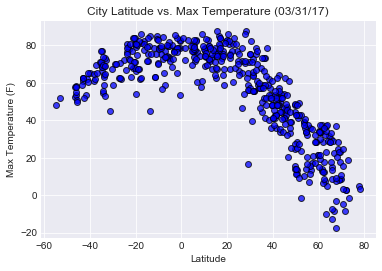

In [18]:
#Plot City Latitude vs. Max Temperature 
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (03/31/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("City Lat vs Max Temp.png")
plt.show()

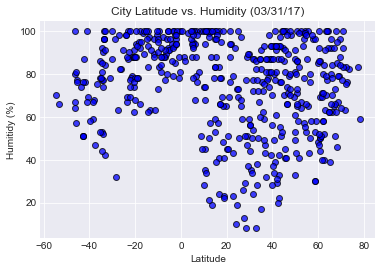

In [19]:
#Plot City Latitude vs. Humidity 
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (03/31/17)")
plt.xlabel("Latitude")
plt.ylabel("Humitidy (%)")
plt.savefig("City Lat vs Humidity.png")
plt.show()

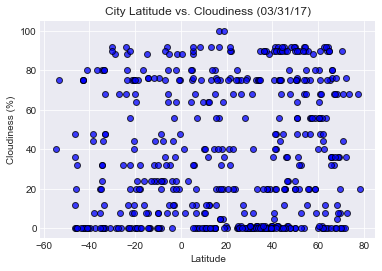

In [20]:
#Plot City Latitude vs. Cloudiness 
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (03/31/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City Lat vs Cloudiness.png")
plt.show()

In [21]:
#Plot City Latitude vs. Wind Speed
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (03/31/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("City Lat vs Wind Speed.png")
plt.show()